__Part I-B GSVA at current prices__

For the analysis below, use Data I-B

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from fractions import Fraction
import numpy as np
import seaborn as sns

extension = 'csv'
df_all = pd.DataFrame()

for f in glob.glob('./Data/NAD*.{}'.format(extension)):
    df = pd.read_csv(f, encoding = 'unicode_escape')
    df["origin"] = f 
    df_all = df_all.append(df, sort=False)
df_all.head()

,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,origin
0,1,"Agriculture, forestry and fishing",9400805.0,11186428.0,12895568.0,14819416.0,17326726.0,20386004.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
1,1.1,Crops,5204052.0,6123041.0,7114707.0,7893514.0,8644285.0,9717089.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
2,1.2,Livestock,2758776.0,3358438.0,3643026.0,4309078.0,5155487.0,5979648.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
3,1.3,Forestry and logging,250314.0,253029.0,280493.0,346160.0,340550.0,335487.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
4,1.4,Fishing and aquaculture,1187663.0,1451920.0,1857342.0,2270664.0,3186404.0,4353780.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv


To perform the analysis only for the duration 2014-15:

In [42]:
df_all.drop(['2011-12', '2012-13', '2013-14', '2015-16', '2016-17'], axis = 1, inplace = True)
df_all.head()

,S.No.,Item,2014-15,origin
0,1,"Agriculture, forestry and fishing",14819416.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
1,1.1,Crops,7893514.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
2,1.2,Livestock,4309078.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
3,1.3,Forestry and logging,346160.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
4,1.4,Fishing and aquaculture,2270664.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv


Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) 

In [43]:
df_all = df_all[~df_all.origin.str.contains("Puducherry")]
df_all = df_all[~df_all.origin.str.contains("Delhi")]
df_all = df_all[~df_all.origin.str.contains("Chandigarh")]
df_all.head()

,S.No.,Item,2014-15,origin
0,1,"Agriculture, forestry and fishing",14819416.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
1,1.1,Crops,7893514.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
2,1.2,Livestock,4309078.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
3,1.3,Forestry and logging,346160.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
4,1.4,Fishing and aquaculture,2270664.0,./Data\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv


In [46]:
#introducing new column origin with States info to the DataFrame
df_all['origin'] = df_all['origin'].map(lambda x: x.split("./Data\\NAD-", 1)[1].split("-GSVA", 1)[0])
df_all.head()

,S.No.,Item,2014-15,origin
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh
1,1.1,Crops,7893514.0,Andhra_Pradesh
2,1.2,Livestock,4309078.0,Andhra_Pradesh
3,1.3,Forestry and logging,346160.0,Andhra_Pradesh
4,1.4,Fishing and aquaculture,2270664.0,Andhra_Pradesh


In [47]:
#Introducing new DataFrame df_percap to contain per capita GDP info for each state
df_percap = df_all[df_all["Item"] == 'Per Capita GSDP (Rs.)']
df_percap = df_percap.sort_values(by ='2014-15', ascending=True) 
print(df_percap)

   S.No.                   Item   2014-15             origin
32    17  Per Capita GSDP (Rs.)   33954.0              Bihar
32    17  Per Capita GSDP (Rs.)   49450.0      Uttar_Pradesh
32    17  Per Capita GSDP (Rs.)   58442.0            Manipur
32    17  Per Capita GSDP (Rs.)   60621.0              Assam
32    17  Per Capita GSDP (Rs.)   62091.0          Jharkhand
32    17  Per Capita GSDP (Rs.)   62989.0     Madhya_Pradesh
32    17  Per Capita GSDP (Rs.)   73979.0             Odisha
32    17  Per Capita GSDP (Rs.)   76228.0          Meghalaya
32    17  Per Capita GSDP (Rs.)   77358.0            Tripura
32    17  Per Capita GSDP (Rs.)   84837.0          Rajasthan
32    17  Per Capita GSDP (Rs.)   86860.0       Chhattisgarh
32    17  Per Capita GSDP (Rs.)   89607.0           Nagaland
32    17  Per Capita GSDP (Rs.)   97687.0            Mizoram
32    17  Per Capita GSDP (Rs.)  104977.0     Andhra_Pradesh
32    17  Per Capita GSDP (Rs.)  112718.0  Arunachal_Pradesh
32    17  Per Capita GSD

Plot the GDP per capita for all the states

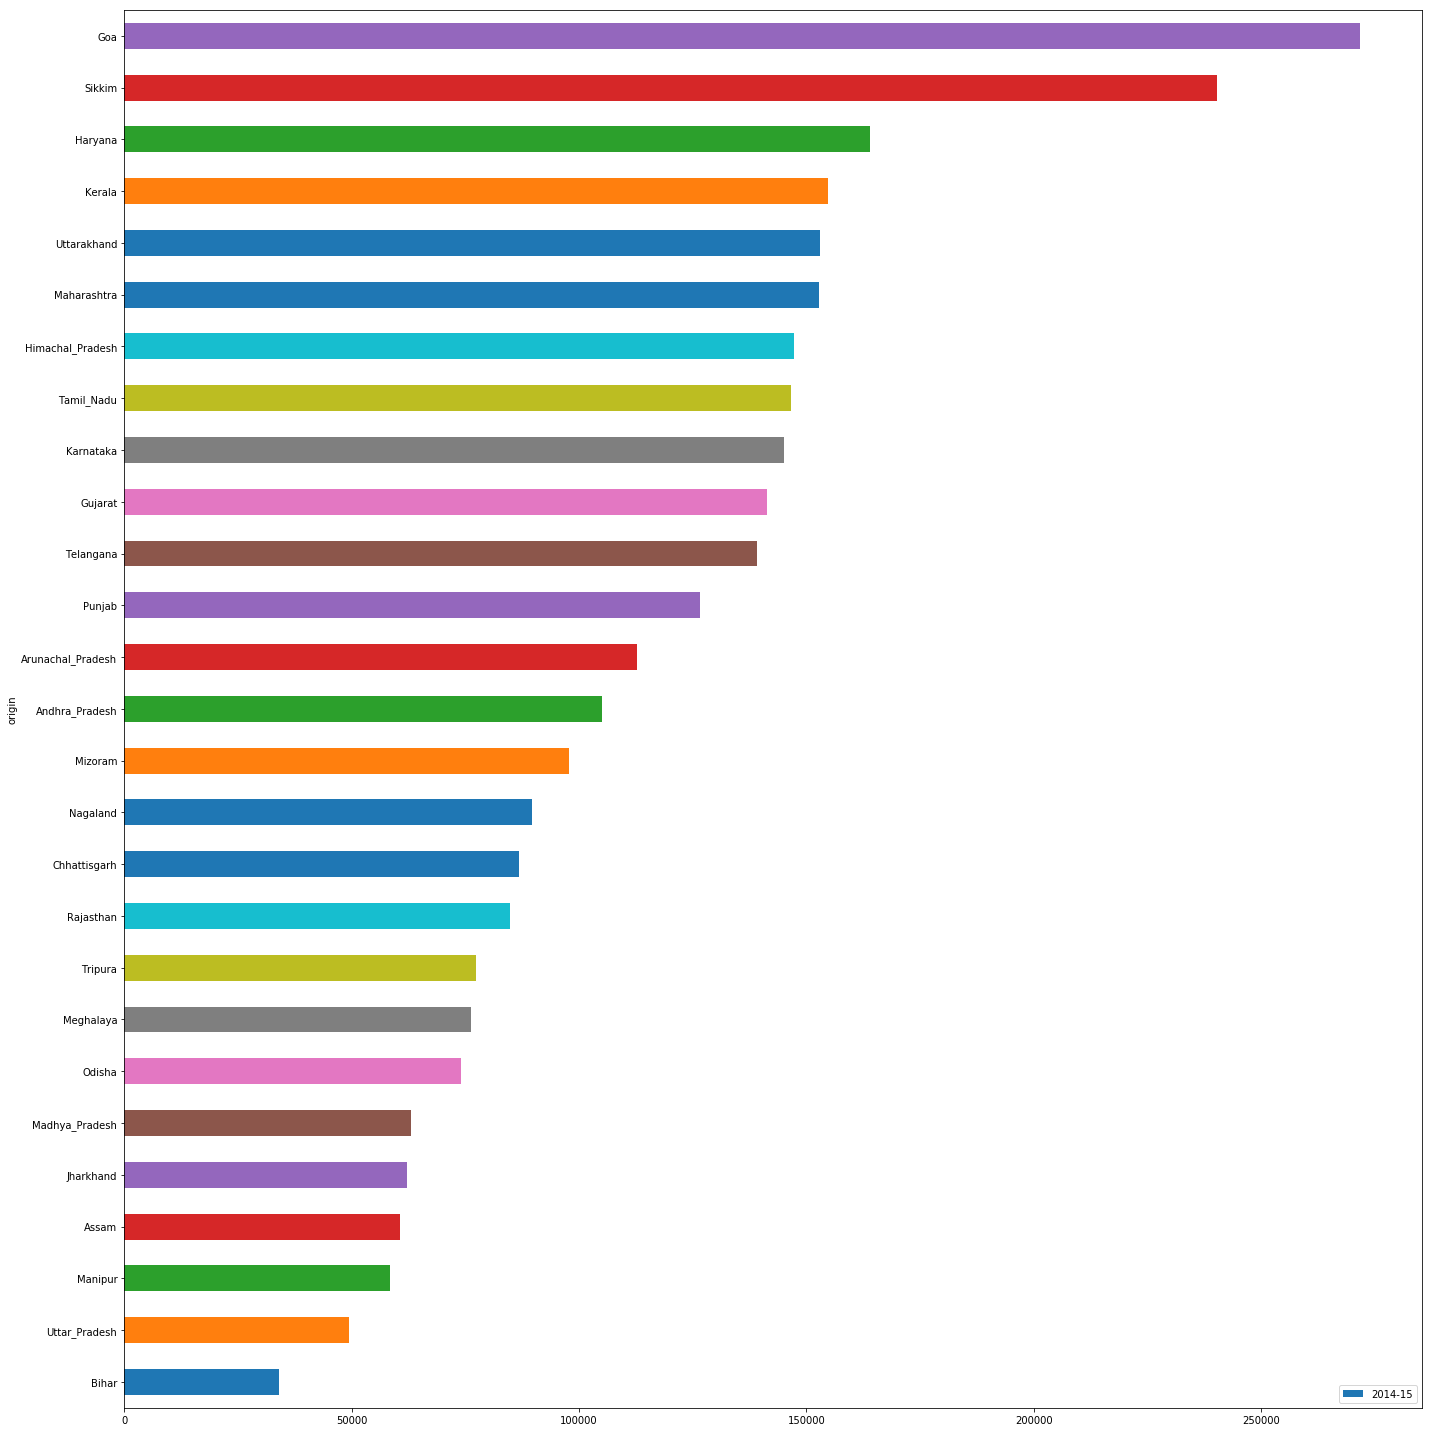

In [48]:
df_percap.plot.barh(x = "origin", y = "2014-15", figsize=(20,20))
plt.tight_layout()

Identify the top 5 and the bottom 5 states based on the GDP per capita.

#Bottom 5 states based on GDP per capita

             Item  2014-15         origin
             
Per Capita GSDP (Rs.)  33954.0          Bihar

Per Capita GSDP (Rs.)  49450.0  Uttar_Pradesh

Per Capita GSDP (Rs.)  58442.0        Manipur

Per Capita GSDP (Rs.)  60621.0          Assam

Per Capita GSDP (Rs.)  62091.0      Jharkhand

       Item   2014-15       origin
       
Per Capita GSDP (Rs.)  153076.0  Uttarakhand

Per Capita GSDP (Rs.)  154778.0       Kerala

Per Capita GSDP (Rs.)  164077.0      Haryana

Per Capita GSDP (Rs.)  240274.0       Sikkim

Per Capita GSDP (Rs.)  271793.0          Goa

In [49]:
#Bottom 5 states based on GDP per capita
print(df_percap[0:5])
#Top 5 states based on GDP per capita
print(df_percap[-5:])

   S.No.                   Item  2014-15         origin
32    17  Per Capita GSDP (Rs.)  33954.0          Bihar
32    17  Per Capita GSDP (Rs.)  49450.0  Uttar_Pradesh
32    17  Per Capita GSDP (Rs.)  58442.0        Manipur
32    17  Per Capita GSDP (Rs.)  60621.0          Assam
32    17  Per Capita GSDP (Rs.)  62091.0      Jharkhand
   S.No.                   Item   2014-15       origin
32    17  Per Capita GSDP (Rs.)  153076.0  Uttarakhand
32    17  Per Capita GSDP (Rs.)  154778.0       Kerala
32    17  Per Capita GSDP (Rs.)  164077.0      Haryana
32    17  Per Capita GSDP (Rs.)  240274.0       Sikkim
32    17  Per Capita GSDP (Rs.)  271793.0          Goa


Find the ratio of the highest per capita GDP to the lowest per capita GDP.

In [50]:
minPerCapGDP = int(df_percap["2014-15"].min())
maxPerCapGDP = int(df_percap["2014-15"].max())

print(Fraction(maxPerCapGDP, minPerCapGDP))

271793/33954


Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [51]:
#Creating a DataFrame for States GDP as df_GSDP_total

df_GSDP_total = df_all.loc[(df_all.Item == "Gross State Domestic Product")][['2014-15','origin']].rename(columns={'2014-15':'GSDP'})

df_GSDP_total.head() 

,GSDP,origin
30,52646842.0,Andhra_Pradesh
30,1676119.0,Arunachal_Pradesh
30,19809800.0,Assam
30,37391988.0,Bihar
30,23498180.0,Chhattisgarh


In [52]:
#Creating another DataFrame to Store Primary, Secondary & Tertiary sector info

df_Prim_Sec_Ter_all = df_all.loc[(df_all.Item == "Primary")][['2014-15','origin']].rename(columns={'2014-15':'Primary_GSVA'})

df_Prim_Sec_Ter_all = pd.merge(df_Prim_Sec_Ter_all, df_all.loc[(df_all.Item == "Secondary")][['2014-15','origin']], how = 'inner', on = 'origin').rename(columns={'2014-15':'Secondary_GSVA'})

df_Prim_Sec_Ter_all = pd.merge(df_Prim_Sec_Ter_all, df_all.loc[(df_all.Item == "Tertiary")][['2014-15','origin']], how = 'inner', on = 'origin').rename(columns={'2014-15':'Tertiary_GSVA'})

# Merging df_GSDP_total to df_Prim_Sec_Ter_all
df_total_GSDP_pri_sec_ter = pd.merge(df_Prim_Sec_Ter_all, df_GSDP_total, how = 'inner', on = 'origin')

print(df_total_GSDP_pri_sec_ter)

    Primary_GSVA             origin  Secondary_GSVA  Tertiary_GSVA  \
0     16303716.0     Andhra_Pradesh      10488884.0     22032942.0   
1       716959.0  Arunachal_Pradesh        287489.0       631844.0   
2      5326697.0              Assam       4033091.0      9307109.0   
3      8019997.0              Bihar       5984896.0     22179969.0   
4      6400817.0       Chhattisgarh       8238886.0      7588778.0   
5       312129.0                Goa       1547536.0      1738217.0   
6     15887187.0            Gujarat      33023538.0     30220377.0   
7      8040424.0            Haryana      12561411.0     19226568.0   
8      1548366.0   Himachal_Pradesh       4119162.0      4133326.0   
9      5248354.0          Jharkhand       6241471.0      8133341.0   
10    12066304.0          Karnataka      20484404.0     50490630.0   
11     6489442.0             Kerala      12070040.0     29673778.0   
12    17854020.0     Madhya_Pradesh      10044889.0     18117360.0   
13    21758383.0    

In [53]:
#Calculating Percentage contribution of each sector for each state

# Creating a new column to calculate the percentage contribution of primary

df_total_GSDP_pri_sec_ter['%_Primary_Sector'] = (df_total_GSDP_pri_sec_ter['Primary_GSVA']/df_total_GSDP_pri_sec_ter['GSDP'])*100
df_total_GSDP_pri_sec_ter['%_Secondary_Sector'] = (df_total_GSDP_pri_sec_ter['Secondary_GSVA']/df_total_GSDP_pri_sec_ter['GSDP'])*100
df_total_GSDP_pri_sec_ter['%_Tertiary_Sector'] = (df_total_GSDP_pri_sec_ter['Tertiary_GSVA']/df_total_GSDP_pri_sec_ter['GSDP'])*100

#Calculating total contributions (Primary+Secondary+Tertiary)
df_total_GSDP_pri_sec_ter['Total%'] = df_total_GSDP_pri_sec_ter['%_Primary_Sector']+df_total_GSDP_pri_sec_ter['%_Secondary_Sector']+df_total_GSDP_pri_sec_ter['%_Tertiary_Sector']

#sorting the DataFrame
df_total_GSDP_pri_sec_ter = df_total_GSDP_pri_sec_ter.sort_values(by='Total%',ascending=False)
    
print(df_total_GSDP_pri_sec_ter)


    Primary_GSVA             origin  Secondary_GSVA  Tertiary_GSVA  \
17      616178.0           Nagaland        212361.0       992956.0   
14      383140.0            Manipur        220173.0      1177334.0   
24      942216.0            Tripura        484393.0      1484709.0   
16      225598.0            Mizoram        270072.0       637619.0   
1       716959.0  Arunachal_Pradesh        287489.0       631844.0   
3      8019997.0              Bihar       5984896.0     22179969.0   
21      138776.0             Sikkim        845253.0       483103.0   
12    17854020.0     Madhya_Pradesh      10044889.0     18117360.0   
20    19113780.0          Rajasthan      13028794.0     26015812.0   
4      6400817.0       Chhattisgarh       8238886.0      7588778.0   
2      5326697.0              Assam       4033091.0      9307109.0   
18     9009306.0             Odisha       8989693.0     12256258.0   
8      1548366.0   Himachal_Pradesh       4119162.0      4133326.0   
15      451050.0    

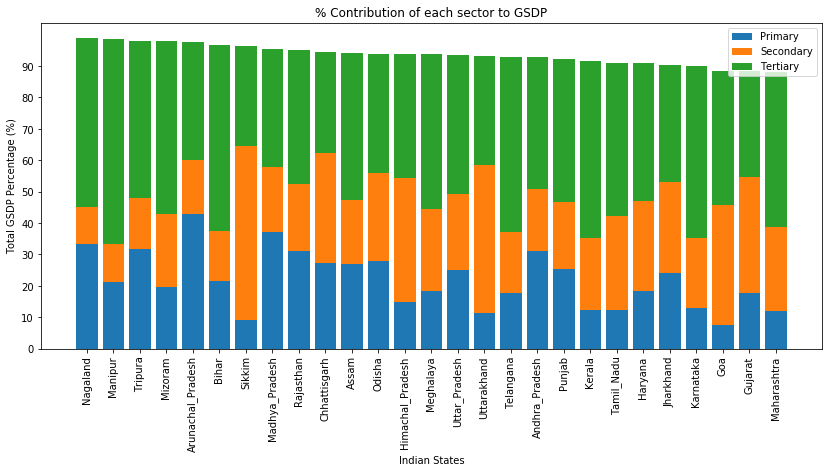

In [54]:
#Plotting Stacked BarChart for % contibution of Primary, Secondary & Tertiary sectors for each state
plt.figure(figsize=(14,6))
plt.bar(df_total_GSDP_pri_sec_ter['origin'], df_total_GSDP_pri_sec_ter['%_Primary_Sector'])
plt.bar(df_total_GSDP_pri_sec_ter['origin'], df_total_GSDP_pri_sec_ter['%_Secondary_Sector'], bottom=df_total_GSDP_pri_sec_ter['%_Primary_Sector'])
plt.bar(df_total_GSDP_pri_sec_ter['origin'], df_total_GSDP_pri_sec_ter['%_Tertiary_Sector'], bottom=np.array(df_total_GSDP_pri_sec_ter['%_Primary_Sector'])+np.array(df_total_GSDP_pri_sec_ter['%_Secondary_Sector']))

plt.ylabel('Total GSDP Percentage (%)')

plt.title('% Contribution of each sector to GSDP')

plt.xticks(df_total_GSDP_pri_sec_ter['origin'] ,rotation=90)

plt.yticks(np.arange(0, 100, 10))

plt.xlabel('Indian States')

plt.legend(['Primary', 'Secondary', 'Tertiary'])

plt.show()


__Which plot will you use here? Why?__
A Stacked BarChart.It is best to be used when two or three categories per group is to be visualised .Stacked bar charts are designed to help simultaneously compare totals and notice sharp changes at the item level that are likely to have the most influence on movements in category totals.

Here, Stacked bar charts makes it easily to visualize percentage distribution of each sector to the states GSDP.

__Why is (Primary + Secondary + Tertiary) not equal to total GDP?__
Gross value added is the output of the country less the intermediate consumption, which is the difference between gross output and net output.
Gross value added is important because it is used to adjust GDP, which is a key indicator of the state of a nation's total economy.
At the firm level, GVA can also be used to measure how much money a product or service has contributed toward meeting the company's fixed costs.

The Formula for GVA Is:


GVA=GDP+SP−TP


SP= Subsidies on products
TP= Taxes on products

__Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.__

I have taken states lower than 25th percentile on per capita GDP. While creating the cottelation matrix I can visualise that the states with lower per capita GDP has low Primary % contribution. They have a positive corelation of 0.21


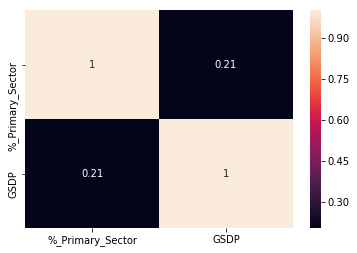

In [55]:
#Add Per Capita GSDP to dataframe
df_total_GSDP_pri_sec_ter = pd.merge(df_total_GSDP_pri_sec_ter, df_all.loc[(df_all.Item == "Per Capita GSDP (Rs.)")][['2014-15','origin']], how = 'inner', on = 'origin').rename(columns={'2014-15':'Per_Capita_GSDP'})
GSDP_corr = df_total_GSDP_pri_sec_ter
#Filtering the 25th percentile per capita GDP states, considering them with least GDP growth
GSDP_corr = GSDP_corr[GSDP_corr.Per_Capita_GSDP <= GSDP_corr.Per_Capita_GSDP.quantile(.25)]
GSDP_corr = GSDP_corr[["origin","%_Primary_Sector","GSDP"]]
#Plotting correlation matrix 
cor = GSDP_corr.corr()
sns.heatmap(cor, annot=True)

Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.


Note: Categorisation into four groups will simplify the subsequent analysis, as otherwise, comparing the data of all the states would become quite exhaustive.

In [56]:
# Creating a sorted dataframe for all states with Per Capita GSDP

states_per_cap = df_all.loc[df_all.Item=='Per Capita GSDP (Rs.)'].sort_values(by='2014-15')[['2014-15','origin']].rename(columns = {'2014-15':'per_capita_GSDP'})

print(states_per_cap)

    per_capita_GSDP             origin
32          33954.0              Bihar
32          49450.0      Uttar_Pradesh
32          58442.0            Manipur
32          60621.0              Assam
32          62091.0          Jharkhand
32          62989.0     Madhya_Pradesh
32          73979.0             Odisha
32          76228.0          Meghalaya
32          77358.0            Tripura
32          84837.0          Rajasthan
32          86860.0       Chhattisgarh
32          89607.0           Nagaland
32          97687.0            Mizoram
32         104977.0     Andhra_Pradesh
32         112718.0  Arunachal_Pradesh
32         126606.0             Punjab
32         139035.0          Telangana
32         141263.0            Gujarat
32         145141.0          Karnataka
32         146503.0         Tamil_Nadu
32         147330.0   Himachal_Pradesh
32         152853.0        Maharashtra
32         153076.0        Uttarakhand
32         154778.0             Kerala
32         164077.0      

In [64]:
# Creating quantiles & categories C1, C2, C3, C4

q1 = round(27*0.20) # total sttes count in the given dataset is 27.

q2 = round(27*0.5)

q3 = round(27*0.85)

q4 = round(27*1)

c4 = states_per_cap.iloc[:q1,:]

c3 = states_per_cap.iloc[q1:q2,:]

c2 = states_per_cap.iloc[q2:q3,:]

c1 = states_per_cap.iloc[q3:q4,:]

In [65]:
c1

,per_capita_GSDP,origin
32,154778.0,Kerala
32,164077.0,Haryana
32,240274.0,Sikkim
32,271793.0,Goa


In [66]:
c2

,per_capita_GSDP,origin
32,112718.0,Arunachal_Pradesh
32,126606.0,Punjab
32,139035.0,Telangana
32,141263.0,Gujarat
32,145141.0,Karnataka
32,146503.0,Tamil_Nadu
32,147330.0,Himachal_Pradesh
32,152853.0,Maharashtra
32,153076.0,Uttarakhand


In [67]:
c3

,per_capita_GSDP,origin
32,62989.0,Madhya_Pradesh
32,73979.0,Odisha
32,76228.0,Meghalaya
32,77358.0,Tripura
32,84837.0,Rajasthan
32,86860.0,Chhattisgarh
32,89607.0,Nagaland
32,97687.0,Mizoram
32,104977.0,Andhra_Pradesh


In [68]:
c4

,per_capita_GSDP,origin
32,33954.0,Bihar
32,49450.0,Uttar_Pradesh
32,58442.0,Manipur
32,60621.0,Assam
32,62091.0,Jharkhand


For each category (C1, C2, C3, C4):
Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.


Note-I: The nomenclature for this project is as follows: primary, secondary and tertiary are named 'sectors', while agriculture, manufacturing etc. are named 'sub-sectors'.


Note-II: If the top 3 sub-sectors contribute to, say, 79% of the GDP of some category, you can report "These top 3 sub-sectors contribute to approximately 80% of the GDP". This is to simplify the analysis and make the results consumable. (Remember, the CEO has to present the report to the CMs, and CMs have limited time; so, the analysis needs to be sharp and concise.)


Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.  

In [69]:
#Computing for C1
df_C1 = df_all.loc[df_all.origin.isin(c1.origin)&(df_all['S.No.']!='Total')&
        (~df_all['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]

df_C1 = df_C1[['Item','2014-15']].groupby(by='Item').sum().sort_values(by='2014-15',ascending=False).reset_index()

#Find % contribution
df_C1['%_of_GSDP_Contribution'] = df_C1['2014-15']/(df_C1['2014-15'][0])*100

# Find top 3 or more
# ignoring GSDP row
start =1; End = 4 

while df_C1.iloc[start:End ,-1].sum() < 79:
    End = End+1  

C1_Sub_Sectors = df_C1[['Item','%_of_GSDP_Contribution']].iloc[start:End].append({'Item':'C1 SUB-SECTORS CONTRIBUTION =','%_of_GSDP_Contribution':round(df_C1.iloc[start:End ,-1].sum(),2)},ignore_index=True).rename(columns={'Item':'C1_Sub_Sectors_contributing_80%_approx_to_GSDP'})

C1_Sub_Sectors


,C1_Sub_Sectors_contributing_80%_approx_to_GSDP,%_of_GSDP_Contribution
0,"Real estate, ownership of dwelling & professio...",14.461049
1,"Agriculture, forestry and fishing",14.119213
2,"Trade, repair, hotels and restaurants",13.730076
3,Manufacturing,13.498187
4,Construction,11.051090
5,Other services,7.907258
6,Crops,7.811695
7,C1 SUB-SECTORS CONTRIBUTION =,82.580000


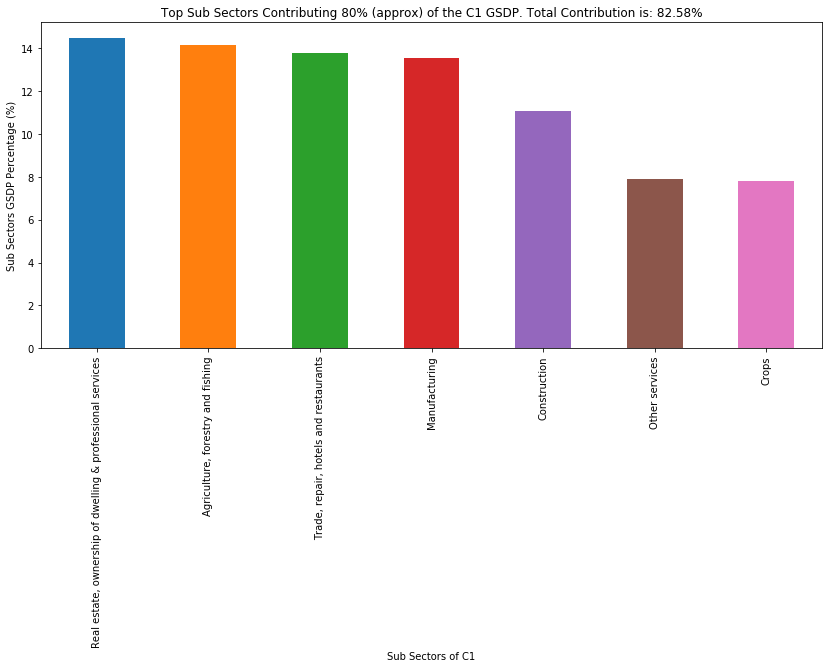

In [70]:
#Plotting for C1
plt.figure(figsize=(14,6))

C1_Sub_Sectors.set_index("C1_Sub_Sectors_contributing_80%_approx_to_GSDP").iloc[:-1,:]['%_of_GSDP_Contribution'].plot(kind='bar')

plt.ylabel('Sub Sectors GSDP Percentage (%)'); plt.xlabel('Sub Sectors of C1')

plt.title('Top Sub Sectors Contributing 80% (approx) of the C1 GSDP. Total Contribution is: {0}%'.format(C1_Sub_Sectors.iloc[-1:,-1:].values[0][0]))

plt.show()

In [71]:
#Computing for C2
df_C2 = df_all.loc[df_all.origin.isin(c2.origin)&(df_all['S.No.']!='Total')&
        (~df_all['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]

df_C2 = df_C2[['Item','2014-15']].groupby(by='Item').sum().sort_values(by='2014-15',ascending=False).reset_index()

#Find % contribution
df_C2['%_of_GSDP_Contribution'] = df_C2['2014-15']/(df_C2['2014-15'][0])*100

# Find top 3 or more
# ignoring GSDP row
start =1; End = 4 

while df_C2.iloc[start:End ,-1].sum() < 79:
    End = End+1  

C2_Sub_Sectors = df_C2[['Item','%_of_GSDP_Contribution']].iloc[start:End].append({'Item':'C2 SUB-SECTORS CONTRIBUTION =','%_of_GSDP_Contribution':round(df_C2.iloc[start:End ,-1].sum(),2)},ignore_index=True).rename(columns={'Item':'C2_Sub_Sectors_contributing_80%_approx_to_GSDP'})

C2_Sub_Sectors


,C2_Sub_Sectors_contributing_80%_approx_to_GSDP,%_of_GSDP_Contribution
0,Manufacturing,18.622130
1,"Real estate, ownership of dwelling & professio...",15.710184
2,"Agriculture, forestry and fishing",12.825977
3,"Trade, repair, hotels and restaurants",10.443537
4,Trade & repair services,9.422608
5,Crops,8.109086
6,Construction,6.932967
7,C2 SUB-SECTORS CONTRIBUTION =,82.070000


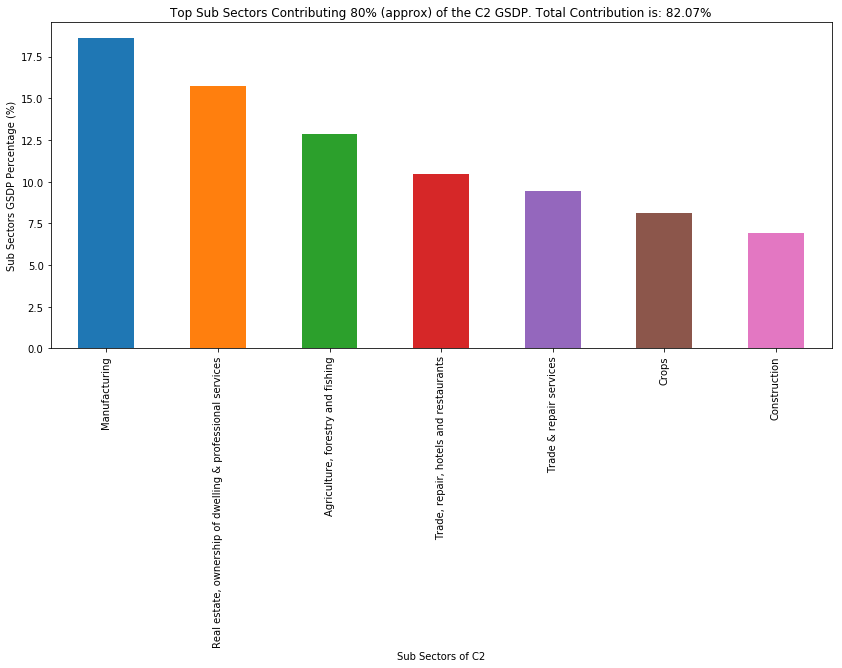

In [72]:
#Plotting for C2
plt.figure(figsize=(14,6))

C2_Sub_Sectors.set_index("C2_Sub_Sectors_contributing_80%_approx_to_GSDP").iloc[:-1,:]['%_of_GSDP_Contribution'].plot(kind='bar')

plt.ylabel('Sub Sectors GSDP Percentage (%)'); plt.xlabel('Sub Sectors of C2')

plt.title('Top Sub Sectors Contributing 80% (approx) of the C2 GSDP. Total Contribution is: {0}%'.format(C2_Sub_Sectors.iloc[-1:,-1:].values[0][0]))

plt.show()

In [73]:
#Computing for C3
df_C3 = df_all.loc[df_all.origin.isin(c3.origin)&(df_all['S.No.']!='Total')&
        (~df_all['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]

df_C3 = df_C3[['Item','2014-15']].groupby(by='Item').sum().sort_values(by='2014-15',ascending=False).reset_index()

#Find % contribution
df_C3['%_of_GSDP_Contribution'] = df_C3['2014-15']/(df_C3['2014-15'][0])*100

# Find top 3 or more
# ignoring GSDP row
start =1; End = 4 

while df_C3.iloc[start:End ,-1].sum() < 79:
    End = End+1  

C3_Sub_Sectors = df_C3[['Item','%_of_GSDP_Contribution']].iloc[start:End].append({'Item':'C3 SUB-SECTORS CONTRIBUTION =','%_of_GSDP_Contribution':round(df_C3.iloc[start:End ,-1].sum(),2)},ignore_index=True).rename(columns={'Item':'C3_Sub_Sectors_contributing_80%_approx_to_GSDP'})

C3_Sub_Sectors


,C3_Sub_Sectors_contributing_80%_approx_to_GSDP,%_of_GSDP_Contribution
0,"Agriculture, forestry and fishing",25.849557
1,Crops,16.312163
2,Manufacturing,11.676084
3,"Trade, repair, hotels and restaurants",9.993973
4,Trade & repair services,9.288358
5,Construction,8.892230
6,C3 SUB-SECTORS CONTRIBUTION =,82.010000


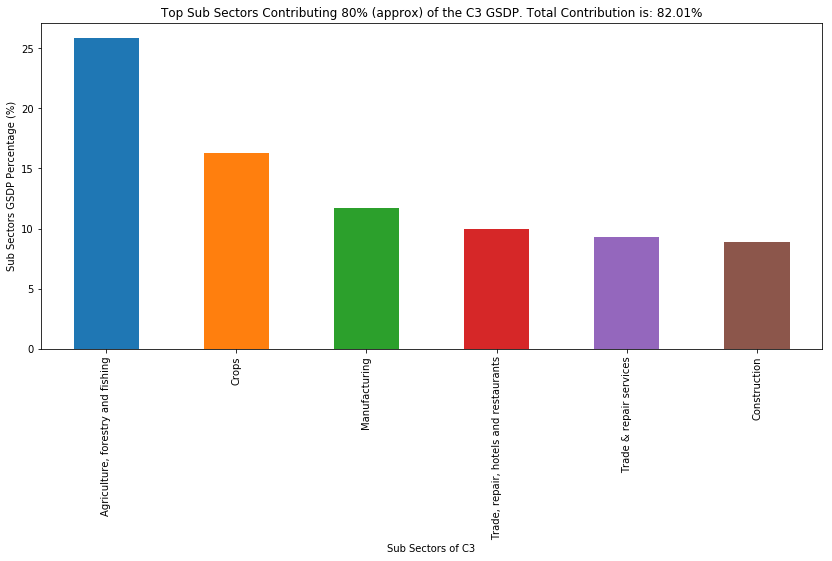

In [74]:
#Plotting for C3
plt.figure(figsize=(14,6))

C3_Sub_Sectors.set_index("C3_Sub_Sectors_contributing_80%_approx_to_GSDP").iloc[:-1,:]['%_of_GSDP_Contribution'].plot(kind='bar')

plt.ylabel('Sub Sectors GSDP Percentage (%)'); plt.xlabel('Sub Sectors of C3')

plt.title('Top Sub Sectors Contributing 80% (approx) of the C3 GSDP. Total Contribution is: {0}%'.format(C3_Sub_Sectors.iloc[-1:,-1:].values[0][0]))

plt.show()

In [75]:
#Computing for C4
df_C4 = df_all.loc[df_all.origin.isin(c4.origin)&(df_all['S.No.']!='Total')&
        (~df_all['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]

df_C4 = df_C4[['Item','2014-15']].groupby(by='Item').sum().sort_values(by='2014-15',ascending=False).reset_index()

#Find % contribution
df_C4['%_of_GSDP_Contribution'] = df_C4['2014-15']/(df_C4['2014-15'][0])*100

# Find top 3 or more
# ignoring GSDP row
start =1; End = 4 

while df_C4.iloc[start:End ,-1].sum() < 79:
    End = End+1  

C4_Sub_Sectors = df_C4[['Item','%_of_GSDP_Contribution']].iloc[start:End].append({'Item':'C4 SUB-SECTORS CONTRIBUTION =','%_of_GSDP_Contribution':round(df_C4.iloc[start:End ,-1].sum(),2)},ignore_index=True).rename(columns={'Item':'C4_Sub_Sectors_contributing_80%_approx_to_GSDP'})

C4_Sub_Sectors

,C4_Sub_Sectors_contributing_80%_approx_to_GSDP,%_of_GSDP_Contribution
0,"Agriculture, forestry and fishing",21.885190
1,Crops,14.112128
2,"Trade, repair, hotels and restaurants",11.957100
3,"Real estate, ownership of dwelling & professio...",11.627645
4,Manufacturing,11.141726
5,Trade & repair services,11.092776
6,C4 SUB-SECTORS CONTRIBUTION =,81.820000


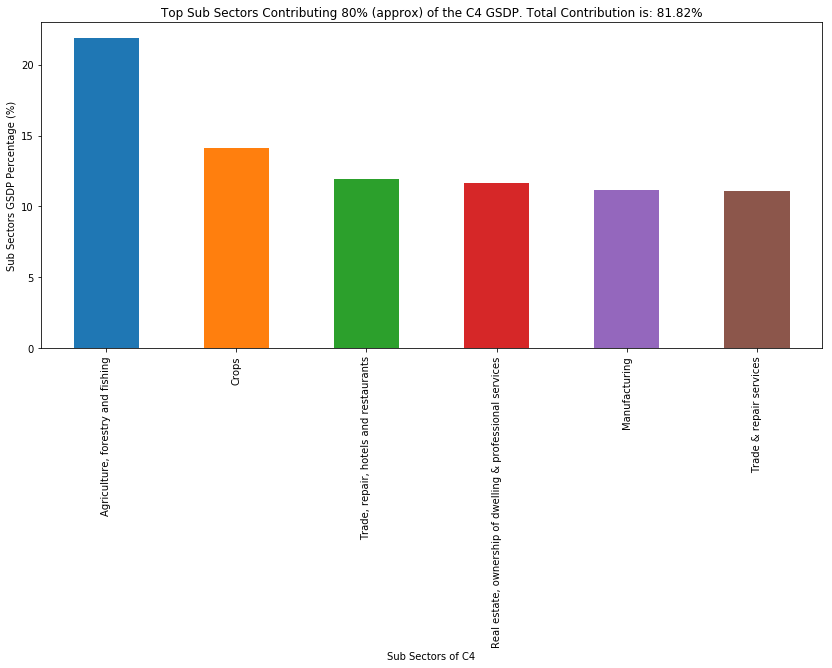

In [76]:
#Plotting for C4
plt.figure(figsize=(14,6))

C4_Sub_Sectors.set_index("C4_Sub_Sectors_contributing_80%_approx_to_GSDP").iloc[:-1,:]['%_of_GSDP_Contribution'].plot(kind='bar')

plt.ylabel('Sub Sectors GSDP Percentage (%)'); plt.xlabel('Sub Sectors of C4')

plt.title('Top Sub Sectors Contributing 80% (approx) of the C4 GSDP. Total Contribution is: {0}%'.format(C4_Sub_Sectors.iloc[-1:,-1:].values[0][0]))

plt.show()

Now that you have summarised the data in the form of plots, tables, etc., try to draw non-obvious insights from it. Think about questions such as:

How does the GDP distribution of the top states (C1) differ from the others?

_Top C1 states very high average per capita GSDP than C2, C3 & C4_

_average per capita GSDP of C1 is more than double of C3 & C4 categories_


In [77]:
print('Average Per-capita of C1 :', round(c1['per_capita_GSDP'].mean()))

print('Average Per-capita of C2 :', round(c2['per_capita_GSDP'].mean()))

print('Average Per-capita of C3 :', round(c3['per_capita_GSDP'].mean()))

print('Average Per-capita of C4 :', round(c4['per_capita_GSDP'].mean()))

Average Per-capita of C1 : 207730
Average Per-capita of C2 : 140503
Average Per-capita of C3 : 83836
Average Per-capita of C4 : 52912


Which sub-sectors seem to be correlated with high GDP?

Agriculture, forestry and fishing

Manufacturing

Real estate, ownership of dwelling & professional services

Trade, repair, hotels and restaurants



In [78]:
df_all[['Item','2014-15']].groupby('Item').sum().sort_values(by = '2014-15', ascending=False).head(10)

,2014-15
Item,
Gross State Domestic Product,1.099530e+09
TOTAL GSVA at basic prices,1.008023e+09
Tertiary,5.064437e+08
Secondary,2.851220e+08
Primary,2.164573e+08
"Agriculture, forestry and fishing",1.885628e+08
Manufacturing,1.699807e+08
"Real estate, ownership of dwelling & professional services",1.472633e+08
Taxes on Products,1.217224e+08


Which sub-sectors do the various categories need to focus on? 

 C1 Sub-sectors:  ['Railways' 'Services incidental to transport' 'Air transport'
 'Water transport' 'Storage'] 

C2 Sub-sectors:  ['Services incidental to transport' 'Air transport'
 'Water transport' 'Road transport'] 

C3 Sub-sectors:  ['Services incidental to transport' 'Services incidental to transport*'
 'Storage' 'Air transport' 'Water transport'] 

C4 Sub-sectors ['Hotels & restaurants' 'Services incidental to transport' 'Storage'
 'Air transport' 'Water transport'] 



In [79]:
print('C1 Sub-sectors: ',df_C1['Item'].tail().values,'\n') 

print('C2 Sub-sectors: ',df_C2['Item'].tail().values, '\n')

print('C3 Sub-sectors: ',df_C3['Item'].tail().values, '\n')

print('C4 Sub-sectors',df_C4['Item'].tail().values, '\n')

C1 Sub-sectors:  ['Railways' 'Services incidental to transport' 'Air transport'
 'Water transport' 'Storage'] 

C2 Sub-sectors:  ['Services incidental to transport' 'Air transport' 'Storage'
 'Water transport' 'Road transport*'] 

C3 Sub-sectors:  ['Services incidental to transport' 'Water transport' 'Storage'
 'Services incidental to transport*' 'Air transport'] 

C4 Sub-sectors ['Hotels & restaurants' 'Services incidental to transport' 'Storage'
 'Air transport' 'Water transport'] 



Ask other such relevant questions, which you think are important, and note your insights for category separately. More insights are welcome and will be awarded accordingly.

Q) Top 3 sub-sectors in each Categories
C1 Sub-sectors:  'Manufacturing'
 'Agriculture, forestry and fishing'
 'Trade, repair, hotels and restaurants'

C2 Sub-sectors: 'Manufacturing'
 'Real estate, ownership of dwelling & professional services'
 'Agriculture, forestry and fishing'
 
C3 Sub-sectors: 'Agriculture, forestry and fishing'
 'Crops' 
 'Manufacturing'

C4 Sub-sectors:  'Agriculture, forestry and fishing'
 'Crops' 
 'Trade, repair, hotels and restaurants'

In [80]:
print('C1 Sub-sectors: ',df_C1['Item'].head().values,'\n') 

print('C2 Sub-sectors: ',df_C2['Item'].head().values, '\n')

print('C3 Sub-sectors: ',df_C3['Item'].head().values, '\n')

print('C4 Sub-sectors: ',df_C4['Item'].head().values, '\n')

C1 Sub-sectors:  ['Gross State Domestic Product'
 'Real estate, ownership of dwelling & professional services'
 'Agriculture, forestry and fishing'
 'Trade, repair, hotels and restaurants' 'Manufacturing'] 

C2 Sub-sectors:  ['Gross State Domestic Product' 'Manufacturing'
 'Real estate, ownership of dwelling & professional services'
 'Agriculture, forestry and fishing'
 'Trade, repair, hotels and restaurants'] 

C3 Sub-sectors:  ['Gross State Domestic Product' 'Agriculture, forestry and fishing'
 'Crops' 'Manufacturing' 'Trade, repair, hotels and restaurants'] 

C4 Sub-sectors:  ['Gross State Domestic Product' 'Agriculture, forestry and fishing'
 'Crops' 'Trade, repair, hotels and restaurants'
 'Real estate, ownership of dwelling & professional services'] 



Finally, provide at least two recommendations for each category to improve the per capita GDP.

In General to improve countries GDP, India has to -

Ensure that stalled projects, particularly in infrastructure, are resurrected and shovel-ready projects commissioned.

Create employment for India’s sizeable and growing workable-age population, with almost 60% of it between the ages of 15 and 54.

Liberalize policy to attract domestic capital investment, foreign direct investment and institutional capital.

C1- Least performing sub-sectors are as follows- 

                                           Railways     
                                    Road transport*       
                   Services incidental to transport       
                                      Air transport       
                                    Water transport        
                                            Storage      
 As one can see that the transport industry hasnt been doing well and is incurring losses and hence unable to contribute much to the GSDP, even though they are big and millions of people use them yearly. Government need to focus on the transportation sector and identify the pain areas and try to build the required infra and also relaxation on taxation.
 
                                        Manufacturing   
                    Agriculture, forestry and fishing     
                Trade, repair, hotels and restaurants  
    Real estate, ownership of dwelling & professio...    
                                         Construction   
                                         
The above mentioned sectors are very strong and contribute a major chunk to GSDP for C1 states and govt. needs to expand the scale of these sectors more.


C2- Least performing sub-sectors are as follows- 
                    Services incidental to transport*     
                                             Railways     
                     Services incidental to transport     
                                        Air transport     
                                      Water transport      
                                              Storage     
 As one can see that the transport industry hasnt been doing well and is incurring losses and hence unable to contribute much to the GSDP, even though they are big and millions of people use them yearly. Government need to focus on the transportation sector and identify the pain areas and try to build the required infra and also relaxation on taxation.
 
                                        Manufacturing  
    Real estate, ownership of dwelling & professio...    
                    Agriculture, forestry and fishing    
                Trade, repair, hotels and restaurants   
                                         
The above mentioned sectors are strong and contribute a major chunk to GSDP for C2 states and govt. needs to expand the scale of these sectors more and need to compare with the C3 industries and bridge the gap.


C3- Least performing sub-sectors are as follows- 
                     Services incidental to transport    
                    Services incidental to transport*      
                                              Storage      
                                        Air transport      
                                      Water transport     
 As one can see that the transport industry is bad and is incurring huge losses and hence unable to contribute much to the GSDP, even though they are big and millions of people use them yearly. Government need to focus on the transportation sector and identify the pain areas and try to build the required infra and also relaxation on taxation.
 
                    Agriculture, forestry and fishing  
                                                Crops    
                                        Manufacturing   
                Trade, repair, hotels and restaurants    
                              Trade & repair services     
                                         Construction     
    Real estate, ownership of dwelling & professio...     
                                       Other services     
                                 Mining and quarrying     
    Transport, storage, communication & services r...   
                                         
The above mentioned sectors are good and contribute a good chunk to GSDP for C3 states and govt. needs to expand the scale of these sectors more. The top sub-sectors arent doing that great as compared to C1 & C2 categories and this area has to be studied and scaled up.

C4- Least performing sub-sectors are as follows- 
                                      Air transport       
                                    Water transport       
 As one can see that the transport industry is the worst and is incurring huge losses and hence unable to contribute much to the GSDP, even though millions of people use them yearly. Government need to focus on the transportation sector and identify the pain areas and try to build the required infra and also relaxation on taxation.
 
                          Gross State Domestic Product    
                    Agriculture, forestry and fishing     
                                                Crops      
                Trade, repair, hotels and restaurants      
    Real estate, ownership of dwelling & professio...  
                                         
The above mentioned sectors are good and contribute a good chunk to GSDP for C4 states and govt. needs to expand the scale of these sectors more. C1, C2, C3 categories are doing way - better in these areas and things needs to scale-up.

__Part-II: GDP and Education Dropout Rates__

You will investigate whether there is any relationship between per capita GDP with dropout rates in education.

In [81]:
# Read the source file
df_drop_out = pd.read_csv(r'./Data/rs_session243_au570_1.1.csv')
df_drop_out.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [82]:
#Columns "Primary - 2014-2015","Primary - 2014-2015.1" have same name in the source file. Need to change accordingly as: 'Primary - 2013-2014' and 'Primary - 2014-2015'
#Also, changing the column name: "Level of Education - State" as "origin" for convenience. 
df_drop_out = df_drop_out.rename(columns = {'Primary - 2014-2015':'Primary - 2013-2014','Primary - 2014-2015.1':'Primary - 2014-2015','Level of Education - State':'origin'})
df_drop_out.head()

,Sl. No.,origin,Primary - 2012-2013,Primary - 2013-2014,Primary - 2014-2015,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [83]:
# Filtering DataFrame for the year 2014-15 and for the class- primary, upper primary and secondary

df_drop_out = df_drop_out[['origin','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]

df_drop_out.head()


,origin,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,0.51,1.69,9.87
1,Andhra Pradesh,6.72,5.20,15.71
2,Arunachal Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
4,Bihar,NaN,4.08,25.90


In [84]:
# Dropping the data having null values.

df_drop_out = df_drop_out.dropna(how='any')

df_drop_out.head()

,origin,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,0.51,1.69,9.87
1,Andhra Pradesh,6.72,5.20,15.71
2,Arunachal Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
6,Chhatisgarh,2.91,5.85,21.26


In [85]:
#Correcting wrong state names in dataframe

df_drop_out = df_drop_out.replace(['Chhatisgarh','Uttrakhand'],['Chhattisgarh','Uttarakhand'])

df_drop_out.head()

,origin,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,0.51,1.69,9.87
1,Andhra Pradesh,6.72,5.20,15.71
2,Arunachal Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
6,Chhattisgarh,2.91,5.85,21.26


In [86]:
#Not removing Union Teritories as they get filtered while merging with the df_all dataframe

#Merging dataframes per-capita-GSDP and dropout rate

df_dropout_percap = pd.merge(df_all[df_all.Item=='Per Capita GSDP (Rs.)'], df_drop_out, how = 'inner', on = 'origin')

df_dropout_percap.head()

,S.No.,Item,2014-15,origin,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,17,Per Capita GSDP (Rs.),60621.0,Assam,15.36,10.51,27.06
1,17,Per Capita GSDP (Rs.),86860.0,Chhattisgarh,2.91,5.85,21.26
2,17,Per Capita GSDP (Rs.),271793.0,Goa,0.73,0.07,11.15
3,17,Per Capita GSDP (Rs.),141263.0,Gujarat,0.89,6.41,25.04
4,17,Per Capita GSDP (Rs.),164077.0,Haryana,5.61,5.81,15.89


In [87]:
#Introducing new column to add drop-outs for each state

df_dropout_percap['Total_dropout_in_2014-15'] = df_dropout_percap.iloc[:,-3:].sum(axis = 1)

df_dropout_percap.head()

,S.No.,Item,2014-15,origin,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Total_dropout_in_2014-15
0,17,Per Capita GSDP (Rs.),60621.0,Assam,15.36,10.51,27.06,52.93
1,17,Per Capita GSDP (Rs.),86860.0,Chhattisgarh,2.91,5.85,21.26,30.02
2,17,Per Capita GSDP (Rs.),271793.0,Goa,0.73,0.07,11.15,11.95
3,17,Per Capita GSDP (Rs.),141263.0,Gujarat,0.89,6.41,25.04,32.34
4,17,Per Capita GSDP (Rs.),164077.0,Haryana,5.61,5.81,15.89,27.31


Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.

_Negative correlation of -0.68 of GDP per capita with dropout rates in education (primary, upper primary and secondary) for_ _the year 2014-2015 for each state. This concludes with increase in drop-outs the GDP decreases._

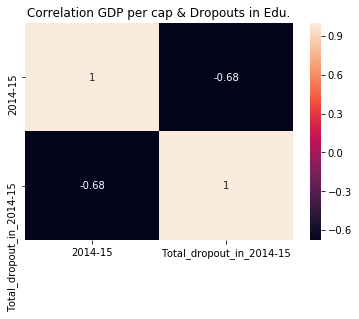

In [88]:
#Correlation Matrix of GDP per capita with dropout rates in education
DropOut_corr = df_dropout_percap[['origin','2014-15', 'Total_dropout_in_2014-15']]
cor = DropOut_corr.corr()
plt.title('Correlation GDP per cap & Dropouts in Edu.')
sns.heatmap(cor, annot=True)

Below correlation metrics there is negative correlation between each Primary, Upper Primary & Secondary Education dropouts to states GDP. 

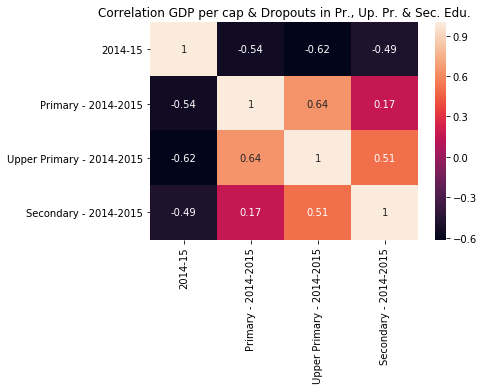

In [89]:
#Correlation Matrix of GDP per capita with dropout rates in primary, upper primary and secondary education
DropOut_corr2 = df_dropout_percap[['origin','2014-15','Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015']]
cor2 = DropOut_corr2.corr()
plt.title('Correlation GDP per cap & Dropouts in Pr., Up. Pr. & Sec. Edu.')
sns.heatmap(cor2, annot=True)


Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?

_Yes, Positive correlation between % contribution of Primary sector & % contribution of Tertiary sector towards GDP and Dropout rate_

_Negative correlation between % contribution of Secondary sector towards GDP and Dropout rate_

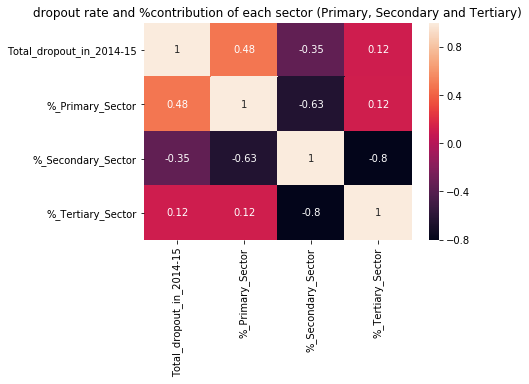

In [90]:
df_dropout_Pr_Sec_Ter = df_dropout_percap[['origin', 'Total_dropout_in_2014-15']]
df_dropout_Pr_Sec_Ter = pd.merge(df_dropout_Pr_Sec_Ter, df_total_GSDP_pri_sec_ter[['%_Primary_Sector','%_Secondary_Sector',  '%_Tertiary_Sector', 'origin']], on = 'origin', how = 'inner')
cor3 = df_dropout_Pr_Sec_Ter.corr()
plt.title('dropout rate and %contribution of each sector (Primary, Secondary and Tertiary)')
sns.heatmap(cor3, annot=True)

You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?

_There is very less corelation between States population & dropout rate in each state, the correlation is at -0.1_

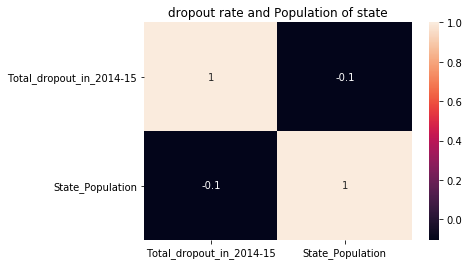

In [96]:
# df_dropout_Population = df_dropout_percap[['origin', 'Total_dropout_in_2014-15']]
# df_dropout_Population.head()
# df_dropout_Population = pd.merge(df_dropout_Population, df_all.loc[(df_all.Item == "Population ('00)")][['2014-15','origin']], how = 'inner', on = 'origin').rename(columns={'2014-15':'State_Population'})
cor4 = df_dropout_Population.corr()
plt.title('dropout rate and Population of state')
sns.heatmap(cor4, annot=True)

In [98]:
print(df_dropout_Population)

          origin  Total_dropout_in_2014-15  State_Population
0          Assam                     52.93          326780.0
1   Chhattisgarh                     30.02          270530.0
2            Goa                     11.95           14950.0
3        Gujarat                     32.34          633590.0
4        Haryana                     27.31          266620.0
5      Jharkhand                     38.47          349660.0
6      Karnataka                     32.05          635100.0
7    Maharashtra                     15.92         1172450.0
8        Manipur                     28.24           30873.0
9      Meghalaya                     36.50           32020.0
10       Mizoram                     36.76           11833.0
11      Nagaland                     31.76           20550.0
12        Odisha                     36.23          435220.0
13        Punjab                     15.13          290673.0
14     Rajasthan                     21.57          721610.0
15        Sikkim        

Write down the key insights you draw from this data:

Form at least one reasonable hypothesis for the observations from the data

_Weak negative correlation between the states population and the dropout rates i.e -0.1_

_Dropout in Education is caused by many factors- poverty, lack of school infrastructures, scarcity of trained teachers, and needs and so on._

_Inability to buy textbooks and a lack of transport to attend school. Several had failed a class and dropped out of school in subsequently_

_The family is in never-ending debt_ 

_The importance of a girl’s education is still not understood_

_Parental separation and ill health often led to the need for girl children to work or stay back at home to care for younger siblings._

_Older boys dropped out to find work._

_Poverty, availability and accessibility are the three big reasons why children drop out of school._